# Classyfing Whiskies (Case Study 4)
### Exploratory Analysis and Classification
<a href="https://github.com/JuanBoho" style="text-decoration:none">JuanBoho</a>
___

**_About Data:_**  The _whiskies.txt_ file contains 86 different whiskies scored between 0-4 for 12 different tasting notes categories, the higher the value, the stronger the presence of that particular flavor. A zero value stands for no flavor presence. In adittion the _regions.txt_ file provides a coordinates pair for distilleries locations.

Dataset by [NESSIE](https://outreach.mathstat.strath.ac.uk/outreach/nessie/index.html). Can be found [here](https://outreach.mathstat.strath.ac.uk/outreach/nessie/nessie_whisky.html).

Index: 
   - [Data Overview](#Data-Overview)
   - [Taste Profile](#Taste-Profile)
   - [Correlations](#Correlations)
   - [Clustering](#Clustering-Whiskies)
   - [Putting all together](#Putting-all-together)
   - [Distilleries locations](#Distilleries-locations)

## Data Overview

In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering

In [2]:
plt.rcParams['figure.figsize'] = [6,4]

In [3]:
# Main Dataframe
df = pd.read_csv('whiskies.csv')
df["Region"] = pd.read_csv('regions.txt') # Adding Region as an extra column
df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Easting,Northing,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,56.6251,-3.8505,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,57.4673,-3.2299,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,57.5627,-2.7602,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,55.6402,-6.1091,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,57.3504,-2.7439,Highlands


In [4]:
# missing values
df.isnull().sum()

RowID         0
Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
Postcode      0
Easting       0
Northing      0
Latitude      0
Longitude     0
Region        0
dtype: int64

In [5]:
df.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Easting,Northing,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01,86.000000,86.000000
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,247035.953488,8.026597e+05,57.098010,-3.705124
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,111329.179983,8.802422e+04,0.806668,1.501922
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14043.000000,5.542600e+05,54.858100,-6.359700
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,172137.500000,7.556975e+05,56.643250,-4.241100
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,295410.000000,8.398850e+05,57.446000,-3.346700
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,326820.000000,8.507700e+05,57.546875,-3.144150
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06,58.967100,3.284100


## Taste Profile

<AxesSubplot:title={'center':'Distilleries By Region'}>

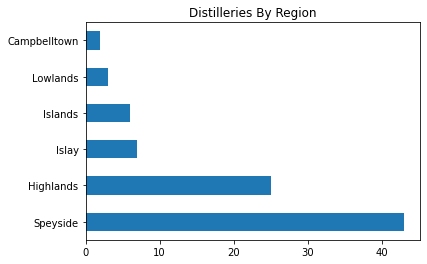

In [6]:
# Distilleries by Region
df['Region'].value_counts().plot(kind="barh",title = "Distilleries By Region")                                 

Since num of distilleries in each region are non-proportional, an accurate _taste profile_ by region isn't an option for all of them. However seems as a good chance to practice.

In [7]:
# Group whiskies by region and compute average score in flavors

reg_dist_num = dict(df['Region'].value_counts()) # num of distilleries in each region

regions = df.groupby(["Region"]).mean() # Group regions by flavors mean
regions = regions.reset_index(level=0, drop=False)

regions.drop(['RowID','Easting', 'Northing', 'Latitude', 'Longitude'], axis=1, inplace=True) # Drop unused cols
regions = regions.round(2) # Round scores

regions

,Region,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Campbelltown,2.00,2.00,2.00,2.00,0.00,1.50,1.00,1.00,2.00,1.50,0.50,1.00
1,Highlands,2.16,2.12,1.68,0.48,0.16,1.16,1.60,0.96,1.60,1.92,1.92,1.44
2,Islands,2.17,1.83,1.83,1.33,0.00,1.33,1.17,0.50,1.17,1.67,1.50,1.33
3,Islay,2.71,1.43,3.14,2.57,0.43,0.71,1.43,0.86,1.29,1.43,1.14,1.14
4,Lowlands,0.67,2.00,0.67,0.00,0.00,0.67,1.33,0.33,0.67,2.00,2.33,2.67
5,Speyside,2.00,2.63,1.19,0.12,0.07,1.40,1.30,1.12,1.49,1.81,1.91,1.95


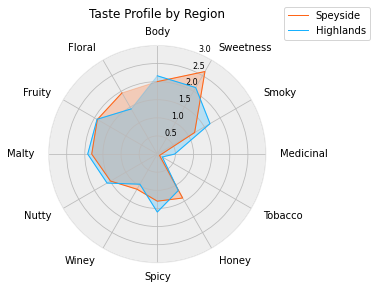

In [8]:
# Radar Chart with pyplot as exercise 
attributes = regions.columns.tolist()[1:] # attributes to plot
num_attributes = len(attributes) 
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist() # Split a circle in even parts and store angles

fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(polar=True))

def add_to_radar(region_name, color):
    values = regions.loc[regions["Region"] == region_name].values.flatten().tolist()[1:] # Select region row vals and store in list
    ax.plot(angles, values, color=color, linewidth=1, label=region_name)
    ax.fill(angles, values, color=color, alpha=0.25)

# Adding Speyside and Highland regions
add_to_radar('Speyside','#ff6517')
add_to_radar('Highlands','#17b1ff')

ax.set_theta_offset(np.pi / 2) # Fix axis
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), attributes) # Draw axis lines for each angle and label.

# Adjust attributes alignment based on position
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center') 
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left') # mirrored
    else:
        label.set_horizontalalignment('right')


ax.set_ylim(0, 3) # Since avergae score max value between 0 and 3

# Add Styles
ax.tick_params(colors='#000000') # Change the color of the tick labels.
ax.tick_params(axis='y', labelsize=8) # smaller Y labels.
ax.grid(color='#bbbbbb') # Circular gridlines color.
ax.spines['polar'].set_color('#eeeeee') # Spine ("stroke() in processing") color.
ax.set_facecolor('#eeeeee')# Background color
ax.set_title('Taste Profile by Region', y= 1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2))


## Correlations

 ### Flavors Correlation

In [9]:
# flavors df
flavors = df.iloc[:,2:14] # all rows, cols 2 to 14
flavors.tail(5)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0
85,2,3,0,0,1,0,2,1,1,2,2,1


In [10]:
# pd.df.corr (correlation in df. Pearson by default)
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


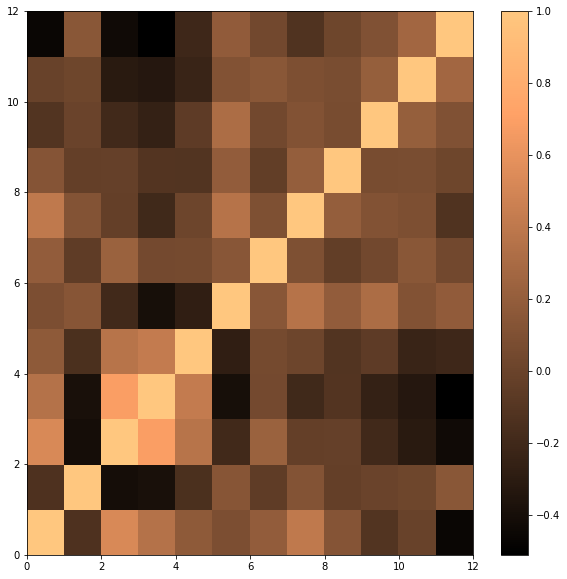

In [11]:
# Flavors correlation matrix plot 

plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors, cmap="copper") # plot the correlation matrix of flavors (corr_flavors) by color
plt.colorbar()
# plt.savefig("corr_flavors.pdf")

### Whiskies Correlation

Looking for the correlation between the 86 destilleries whiskies in terms of their flavors. (Wich whisky is similar to an other in flavor).

In [12]:
# Whisky_corr df
corr_whisky = pd.DataFrame.corr(flavors.transpose())
corr_whisky.tail(15)

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
71,0.765207,0.744793,0.752649,-0.041583,0.607644,0.484544,0.677919,0.745356,0.863034,0.410792,...,0.583874,0.149071,0.807573,0.467099,0.203030,0.765207,0.410792,0.488901,0.484544,0.349215
72,0.495204,0.619705,0.626242,-0.034599,0.505590,0.851126,0.407379,0.620174,0.598406,0.455733,...,0.518200,0.206725,0.671941,0.518200,0.431714,0.495204,0.759555,0.716726,0.403165,0.561758
73,0.827379,0.538405,0.788761,-0.113302,0.709575,0.440086,0.659699,0.754337,0.951817,0.426401,...,0.636364,-0.019342,0.817303,0.545455,0.184402,0.827379,0.319801,0.353423,0.565825,0.462168
74,0.156627,0.196005,-0.008204,0.500859,0.301372,0.297537,-0.272183,0.190117,0.020383,0.388075,...,0.033095,0.528104,-0.114437,0.132381,0.182213,-0.228916,0.620920,0.207839,0.526411,-0.148457
75,0.797802,0.789418,0.593796,-0.263147,0.662994,0.140981,0.690359,0.780720,0.690541,0.328688,...,0.586094,-0.032530,0.669662,0.433200,0.014768,0.649374,0.328688,0.502953,0.387699,0.502953
76,0.463332,0.455573,0.631008,0.032372,0.413919,0.502956,0.681689,0.522233,0.699866,0.852803,...,1.000000,0.290129,0.408651,0.863636,0.684922,0.529523,0.293151,0.407795,0.251478,0.734032
77,-0.021124,0.132175,0.014384,0.898820,0.301941,0.280900,-0.252646,0.037037,0.107211,0.612372,...,0.290129,1.000000,-0.200643,0.116052,0.554877,-0.021124,0.340207,-0.156174,0.200643,0.190879
78,0.801060,0.658758,0.857180,-0.347003,0.531610,0.478261,0.699544,0.722315,0.774403,0.147442,...,0.408651,-0.200643,1.000000,0.408651,0.091090,0.846835,0.368605,0.620437,0.304348,0.282017
79,0.463332,0.269202,0.631008,-0.016186,0.413919,0.502956,0.681689,0.348155,0.615882,0.772853,...,0.863636,0.116052,0.408651,1.000000,0.684922,0.529523,0.373101,0.570914,0.157174,0.489355
80,0.163033,0.132014,0.280806,0.417436,0.068539,0.637630,0.216653,0.050443,0.275813,0.710472,...,0.684922,0.554877,0.091090,0.684922,1.000000,0.239754,0.247121,0.165436,-0.091090,0.354507


(0.0, 86.0, 0.0, 86.0)

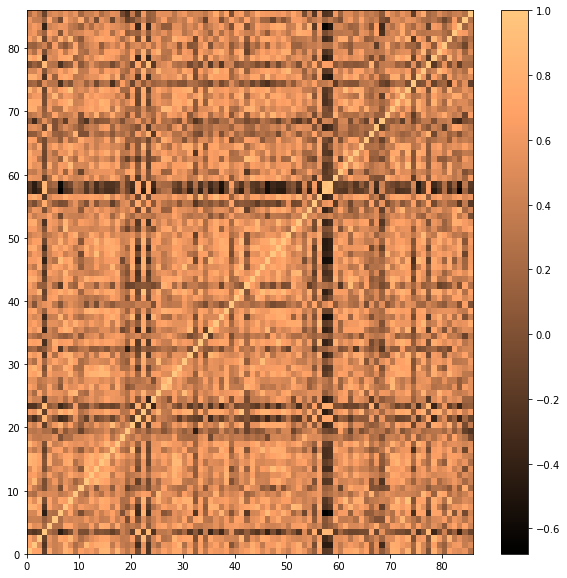

In [13]:
# Whisky correlation matrix plot

plt.figure(figsize= (10,10))
plt.pcolor(corr_whisky, cmap="copper") 
plt.colorbar()
plt.axis("tight") # No white spaces on plot
# plt.savefig("corr_whisky.pdf")

## Clustering Whiskies
### Spectral Co-clustering 
This is a useful method for finding clusters by the similarity of their attributes.

**Note:**
- The meaning of 'spectral' means using eigenvalues and eigen vectors of some matrix.
- The algorithm is based on the 'Laplacian' matrix. (L = Degree matrix - Adjacency matrix).
- Eigen vectors (v) and eigen values (λ) refer to those who after a transformation don't change their direction, only stretch.
  eigenvalue is an eigen vector sort on a 'scalar value'.

In [14]:
# Model
model = SpectralCoclustering(n_clusters=6, random_state=0) # 6 clusters
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=0)

In [15]:
# model.rows_ # True if whisky belongs to cluster, false otherwise

np.sum(model.rows_, axis=1) # Tells how many whiskies belog to a cluster

array([20,  5, 19, 17,  6, 19])

In [16]:
np.sum(model.rows_, axis=0) # how many clusters belong to each observation. 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
model.row_labels_ # Which cluster for each whiskey 

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

## Putting all together

#### Updating main dataframe

In [18]:
# Adding "Cluster" column to main df
df['Cluster'] = pd.Series(model.row_labels_, index=df.index) 

Now, reorder the rows in increasing order by group labels.These are the group labels discovered using spectral co-clustering.

In [19]:
df = df.iloc[np.argsort(model.row_labels_)]
df

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,...,Malty,Fruity,Floral,Postcode,Easting,Northing,Latitude,Longitude,Region,Cluster
85,86,Tullibardine,2,3,0,0,1,0,2,1,...,2,2,1,PH4 1QG,289690,708850,56.2592,-3.7826,Highlands,0
33,34,GlenElgin,2,3,1,0,0,2,1,1,...,1,2,3,IV30 3SL,322640,861040,57.5978,-3.2807,Speyside,0
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,...,2,0,1,AB4 3JT,372120,860400,57.6578,-2.5128,Speyside,0
40,41,GlenSpey,1,3,1,0,0,0,1,1,...,2,0,2,AB38 7AU,327760,849140,57.5265,-3.2078,Speyside,0
45,46,Glenfiddich,1,3,1,0,0,0,0,0,...,2,2,2,AB55 4DH,33268,840840,57.4545,-3.1283,Speyside,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,Glengoyne,1,2,0,0,0,1,1,1,...,2,3,2,G63 9LB,25281,682750,56.0149,-4.3630,Highlands,5
31,32,Edradour,2,3,1,0,0,2,1,1,...,2,2,2,PH16 5JP,295960,757940,56.7016,-3.7024,Highlands,5
35,36,GlenGrant,1,2,0,0,0,1,0,1,...,1,2,1,AB38 7BS,327610,849570,57.5303,-3.2108,Speyside,5
71,72,Scapa,2,2,1,1,0,2,1,1,...,2,2,2,KW15 1SE,342850,1008930,58.9637,-2.9958,Islands,5


Finally, reset the index of df. So reshuffled the rows and columns of the tabl and then recalculate the correlation

In [20]:
df = df.reset_index(drop=True)
df

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,...,Malty,Fruity,Floral,Postcode,Easting,Northing,Latitude,Longitude,Region,Cluster
0,86,Tullibardine,2,3,0,0,1,0,2,1,...,2,2,1,PH4 1QG,289690,708850,56.2592,-3.7826,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,...,1,2,3,IV30 3SL,322640,861040,57.5978,-3.2807,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,...,2,0,1,AB4 3JT,372120,860400,57.6578,-2.5128,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,...,2,0,2,AB38 7AU,327760,849140,57.5265,-3.2078,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,...,2,2,2,AB55 4DH,33268,840840,57.4545,-3.1283,Speyside,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,47,Glengoyne,1,2,0,0,0,1,1,1,...,2,3,2,G63 9LB,25281,682750,56.0149,-4.3630,Highlands,5
82,32,Edradour,2,3,1,0,0,2,1,1,...,2,2,2,PH16 5JP,295960,757940,56.7016,-3.7024,Highlands,5
83,36,GlenGrant,1,2,0,0,0,1,0,1,...,1,2,1,AB38 7BS,327610,849570,57.5303,-3.2108,Speyside,5
84,72,Scapa,2,2,1,1,0,2,1,1,...,2,2,2,KW15 1SE,342850,1008930,58.9637,-2.9958,Islands,5


#### Correlations Plot: Original vs Rearranged 

In [21]:
# Correlations
correlations = pd.DataFrame.corr(df.iloc[:,2:14].transpose())
correlations = np.array(correlations) # This beacuse pandas returns a dataFrame and we need an array.

(0.0, 86.0, 0.0, 86.0)

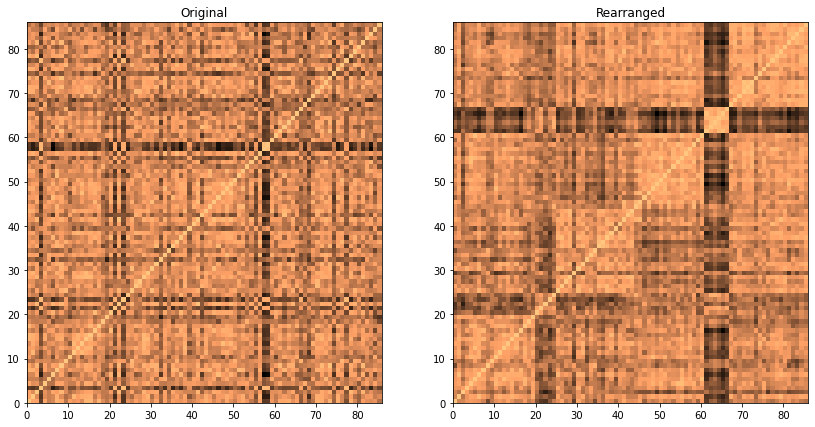

In [22]:
# Original corr vs New corr

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky, cmap="copper")
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations, cmap="copper")
plt.title("Rearranged")
plt.axis("tight")
# plt.savefig("Whisky_flavors_correlations.pdf")

## Distilleries locations

In [23]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Text(0.5, 1.0, 'Distilleries Locations')

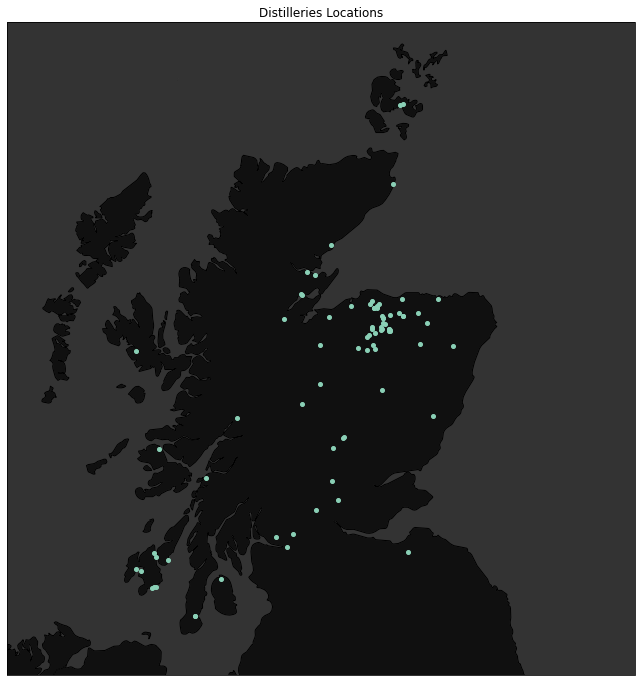

In [131]:
proj = ccrs.Mercator()
plt.figure(figsize=(12,12))

ax = plt.axes(projection = proj)
ax.set_extent([-8, 0, 55,59.5], crs=ccrs.PlateCarree()) #Trial and error
#features of map
ax.add_feature(cfeature.LAND,facecolor=("#101010"))
ax.add_feature(cfeature.OCEAN,facecolor=("#333333"))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# plot each datapoint
for ix, row in df.iterrows():
    x, y = df.Longitude[ix], df.Latitude[ix]
    ax.plot(x, y, marker='o', color='#8AD0B6', markersize=4, alpha=1, transform=ccrs.Geodetic())
plt.title('Distilleries Locations_Map')
# plt.savefig("Destilleries_location_map.png") 

#### Locations by clusters

Text(0.5, 1.0, 'Clusters Locations Map')

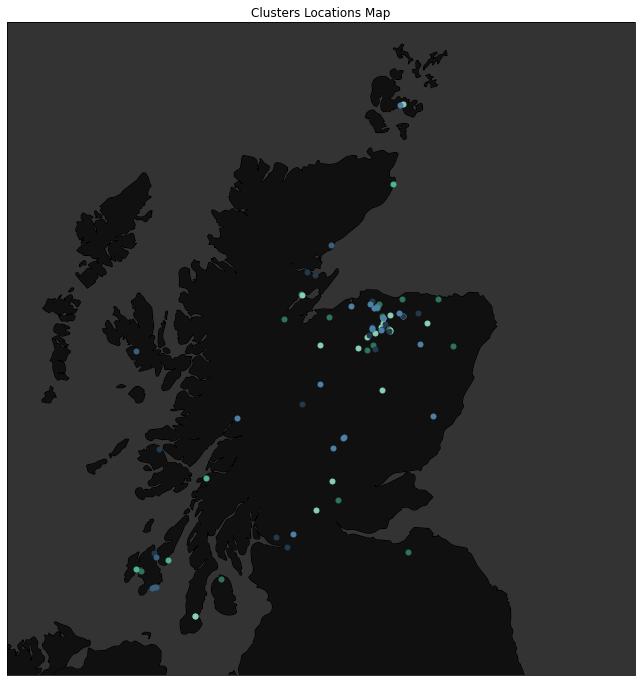

In [133]:
# Whiskies by cluster
plt.figure(figsize=(12,12))
bx = plt.axes(projection = proj)
bx.set_extent([-8, 0, 55,59.5], crs=ccrs.PlateCarree()) #Trial and error
#features of map
bx.add_feature(cfeature.LAND,facecolor=("#101010"))
bx.add_feature(cfeature.OCEAN,facecolor=("#333333"))
bx.add_feature(cfeature.COASTLINE)
bx.add_feature(cfeature.BORDERS, linestyle=':')

colors = ['#2F755A', '#4CB88F', '#8AD0B6', '#223A4C', '#39607F', '#4C81A9'] # TODO: look for a better palette
for ix, row in df.iterrows():
    x, y = df.Longitude[ix], df.Latitude[ix]
    cluster_color = colors[df.Cluster[ix]]
    bx.plot(x, y, marker='o', color=cluster_color, markersize=5, alpha=1, transform=ccrs.Geodetic())
plt.title('Clusters Locations Map')    
# plt.savefig("DestilleriesClusters_location_map.png") 